<a href="https://colab.research.google.com/github/HagarElsherbiny/StockMarketPrediction/blob/main/Nike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
nike = pd.read_csv('/content/gdrive/My Drive/NKE.csv')


In [12]:
nike.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,100.589996,102.000000,100.309998,101.919998,98.857353,4541800
1,2020-01-06,100.949997,101.839996,100.870003,101.830002,98.770073,4612400
2,2020-01-07,101.809998,102.739998,100.809998,101.779999,98.721573,6719900
3,2020-01-08,101.309998,102.139999,100.849998,101.550003,98.498489,4942200
4,2020-01-09,101.940002,102.410004,101.389999,101.480003,98.430588,5007500


In [13]:

nike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [15]:
length_data = len(nike)     # rows that data has
split_ratio = 0.8          # %80 train + %20 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 755
Train data length : 604
Validation data lenth : 151


In [20]:
train_data = nike[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2020-01-03,100.589996
1,2020-01-06,100.949997
2,2020-01-07,101.809998
3,2020-01-08,101.309998
4,2020-01-09,101.940002
...,...,...
599,2022-05-19,108.949997
600,2022-05-20,108.669998
601,2022-05-23,107.470001
602,2022-05-24,107.110001


In [21]:
validation_data = nike[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
604,2022-05-26,110.000000
605,2022-05-27,114.220001
606,2022-05-31,117.500000
607,2022-06-01,119.830002
608,2022-06-02,119.510002
...,...,...
750,2022-12-23,116.110001
751,2022-12-27,116.470001
752,2022-12-28,117.580002
753,2022-12-29,116.080002


In [24]:
#Creating Train Dataset from Train split

dataset_train = train_data.Open.values
dataset_train.shape


(604,)

In [25]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(604, 1)

In [26]:
#Normalization / Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(604, 1)

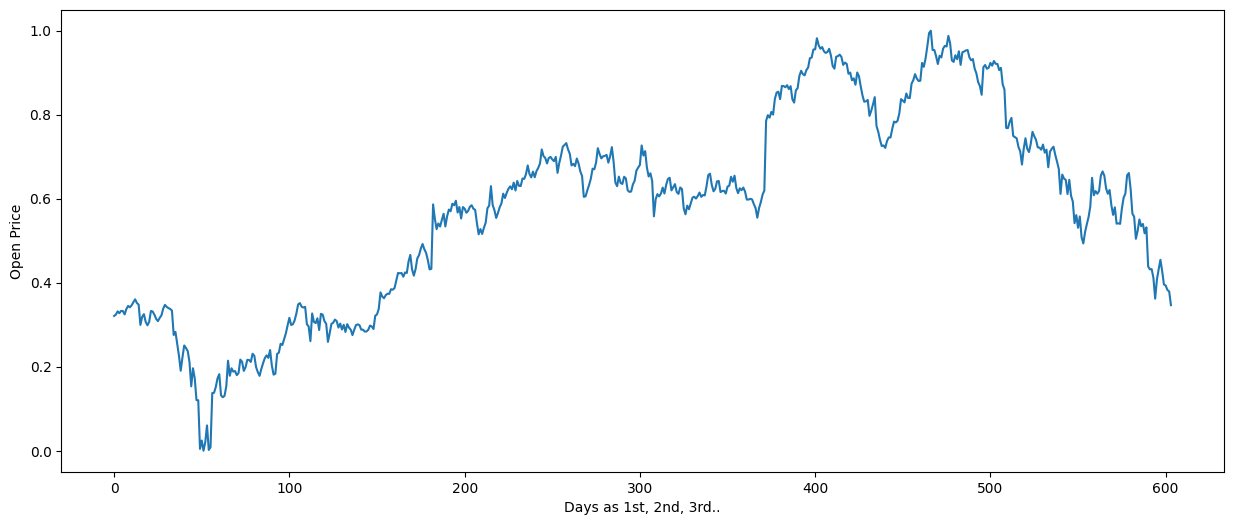

In [27]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [29]:
#Creating X_train and y_train from Train data

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

        
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (554, 50)
Shape of y_train before reshape : (554,)


In [31]:
#Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (554, 50, 1)
Shape of y_train after reshape : (554, 1)


In [32]:
X_train[0]

array([[0.32090349],
       [0.32413046],
       [0.33183933],
       [0.32735743],
       [0.33300466],
       [0.33255644],
       [0.32457868],
       [0.33757614],
       [0.3447472 ],
       [0.34143057],
       [0.34636068],
       [0.35371098],
       [0.36043382],
       [0.35173894],
       [0.34779485],
       [0.29956971],
       [0.31866254],
       [0.32520614],
       [0.30683036],
       [0.29867335],
       [0.30665111],
       [0.33273576],
       [0.33139117],
       [0.32368232],
       [0.31391176],
       [0.30862315],
       [0.31624236],
       [0.32224808],
       [0.33811401],
       [0.34725705],
       [0.34250625],
       [0.3394586 ],
       [0.3376658 ],
       [0.33354246],
       [0.27563642],
       [0.28289706],
       [0.25358551],
       [0.22597703],
       [0.19039079],
       [0.2223915 ],
       [0.25053779],
       [0.24462173],
       [0.23727142],
       [0.21127643],
       [0.15328072],
       [0.19630692],
       [0.17219432],
       [0.120

In [33]:
y_train[0]

array([0.02438151])

In [34]:
#Creating RNN model

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )


regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
18/18 [==============================] - 7s 96ms/step - loss: 0.3947 - accuracy: 0.0018
Epoch 2/100
18/18 [==============================] - 1s 54ms/step - loss: 0.2963 - accuracy: 0.0036
Epoch 3/100
18/18 [==============================] - 1s 52ms/step - loss: 0.2427 - accuracy: 0.0036
Epoch 4/100
18/18 [==============================] - 1s 53ms/step - loss: 0.2165 - accuracy: 0.0036
Epoch 5/100
18/18 [==============================] - 1s 54ms/step - loss: 0.1579 - accuracy: 0.0018
Epoch 6/100
18/18 [==============================] - 1s 53ms/step - loss: 0.1344 - accuracy: 0.0036
Epoch 7/100
18/18 [==============================] - 1s 53ms/step - loss: 0.1195 - accuracy: 0.0036
Epoch 8/100
18/18 [==============================] - 1s 53ms/step - loss: 0.1103 - accuracy: 0.0036
Epoch 9/100
18/18 [==============================] - 1s 54ms/step - loss: 0.1001 - accuracy: 0.0036
Epoch 10/100
18/18 [==============================] - 1s 53ms/step - loss: 0.0968 - accuracy: 0.0036

In [35]:
#Evaluating Model


# Losses
history.history["loss"]

[0.39470013976097107,
 0.29626819491386414,
 0.242682084441185,
 0.21651236712932587,
 0.15789224207401276,
 0.13440245389938354,
 0.11954428255558014,
 0.11033434420824051,
 0.10008306056261063,
 0.09679193794727325,
 0.08832387626171112,
 0.07157480716705322,
 0.06177477538585663,
 0.06837276369333267,
 0.06376001983880997,
 0.06182436645030975,
 0.051009342074394226,
 0.05047032982110977,
 0.04731487110257149,
 0.04309919849038124,
 0.04274317994713783,
 0.03719285503029823,
 0.03445478528738022,
 0.03778022155165672,
 0.031433623284101486,
 0.036421388387680054,
 0.030877811834216118,
 0.02671615593135357,
 0.023903103545308113,
 0.026473384350538254,
 0.02650345489382744,
 0.024628063663840294,
 0.0252542607486248,
 0.02687446027994156,
 0.02317158877849579,
 0.020763060078024864,
 0.01841469667851925,
 0.019852709025144577,
 0.01787499152123928,
 0.018380267545580864,
 0.016539568081498146,
 0.01690034568309784,
 0.01755378767848015,
 0.01724533550441265,
 0.014897476881742477,
 

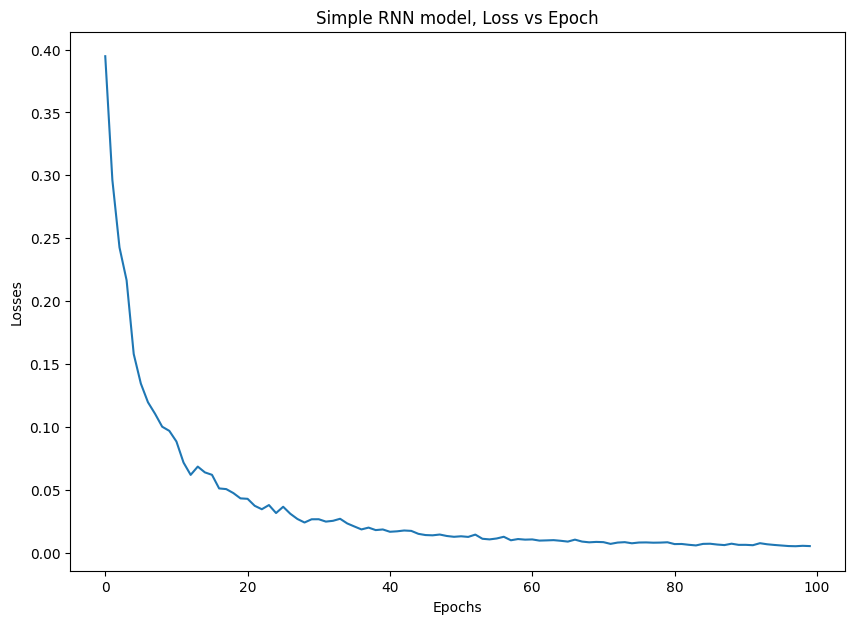

In [36]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

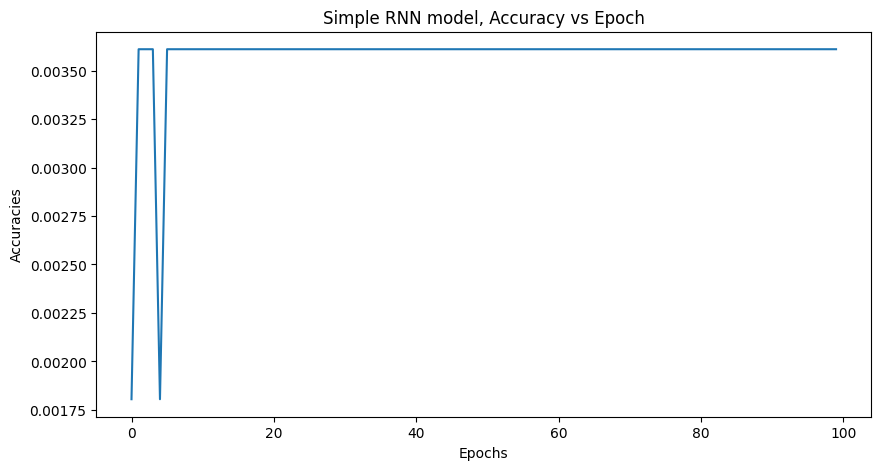

In [37]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [38]:
#Model predictions for train data

y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

18/18 [==============================] - 1s 15ms/step


(554, 1)

In [39]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(554, 1)

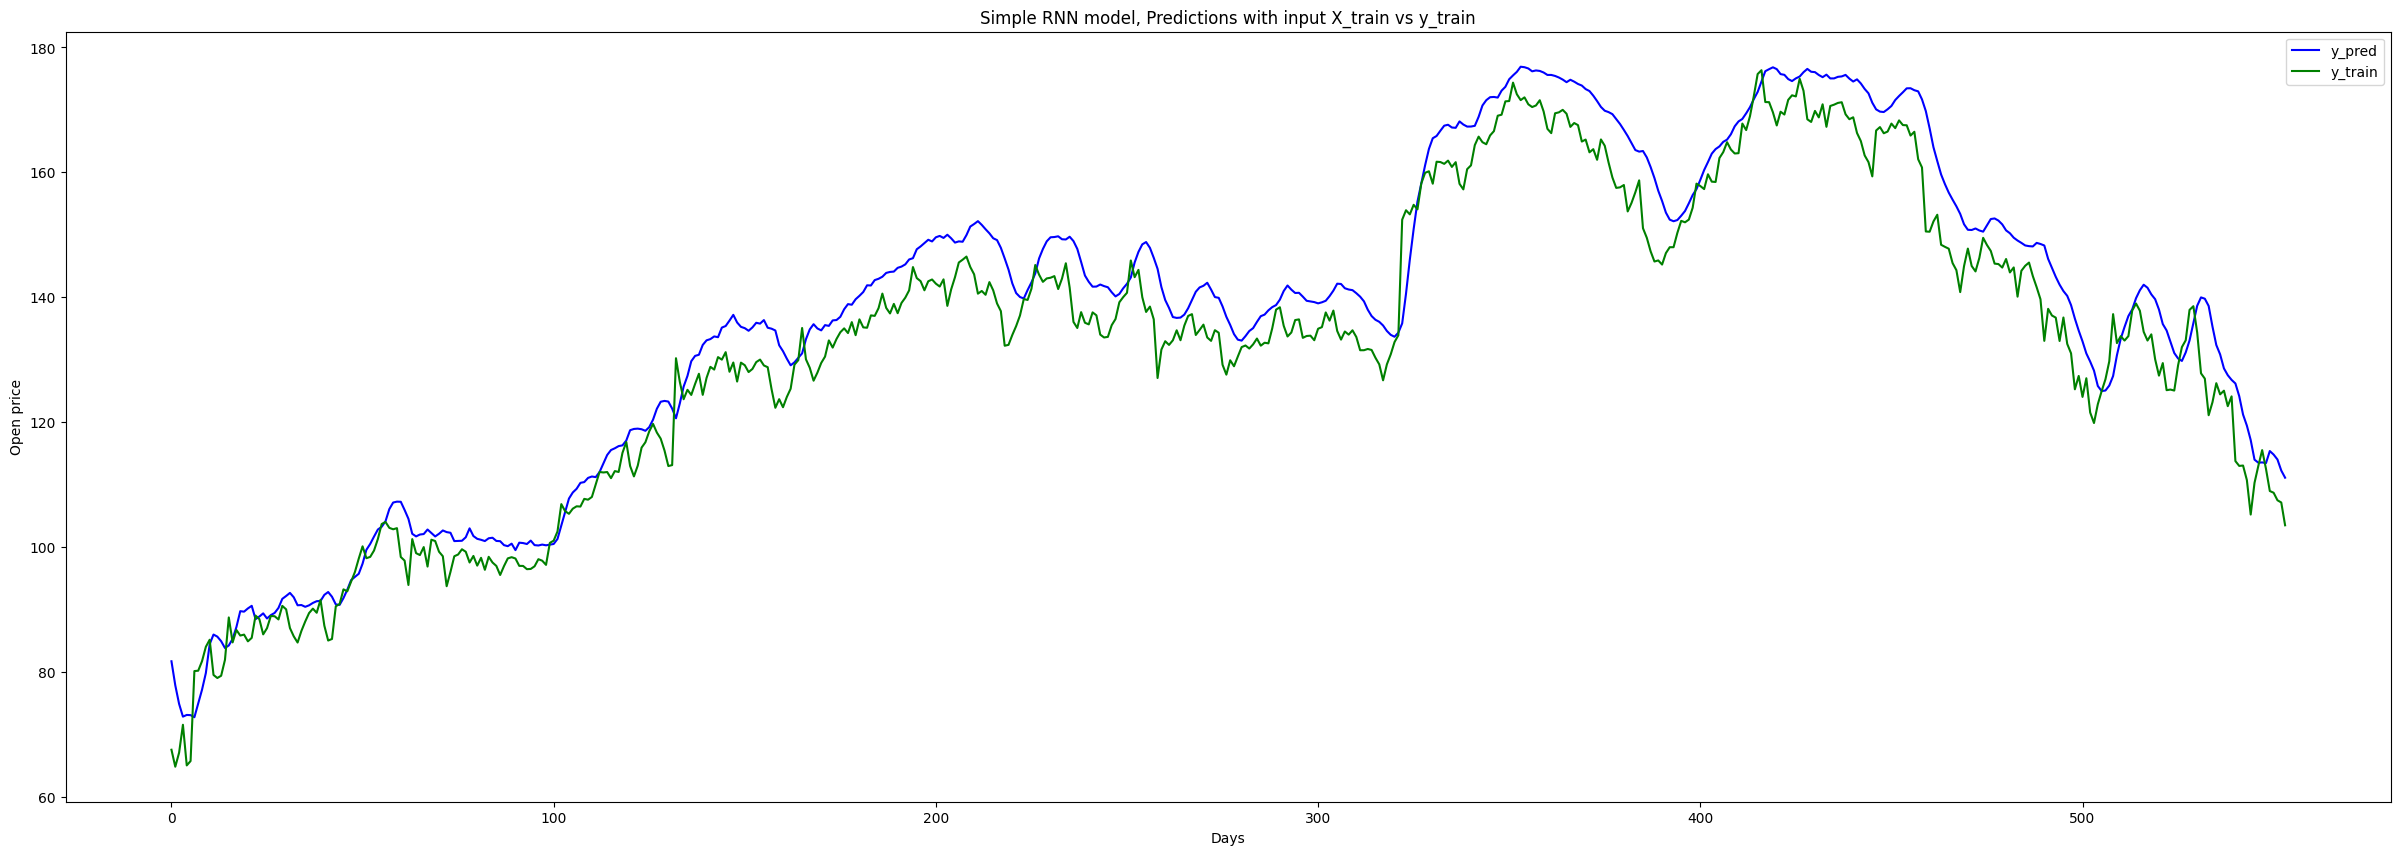

In [40]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [41]:
#Creating Test Dataset from Validation Data

#Converting array and scaling

dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (151, 1)


In [42]:
#Creating X_test and y_test

X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [43]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [44]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (101, 50)
Shape of y_test before reshape : (101,)


In [45]:
#Reshape

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [46]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (101, 50, 1)
Shape of y_test after reshape : (101, 1)


In [47]:
#Evaluating with Validation Data

# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

4/4 [==============================] - 0s 25ms/step
Shape of y_pred_of_test : (101, 1)


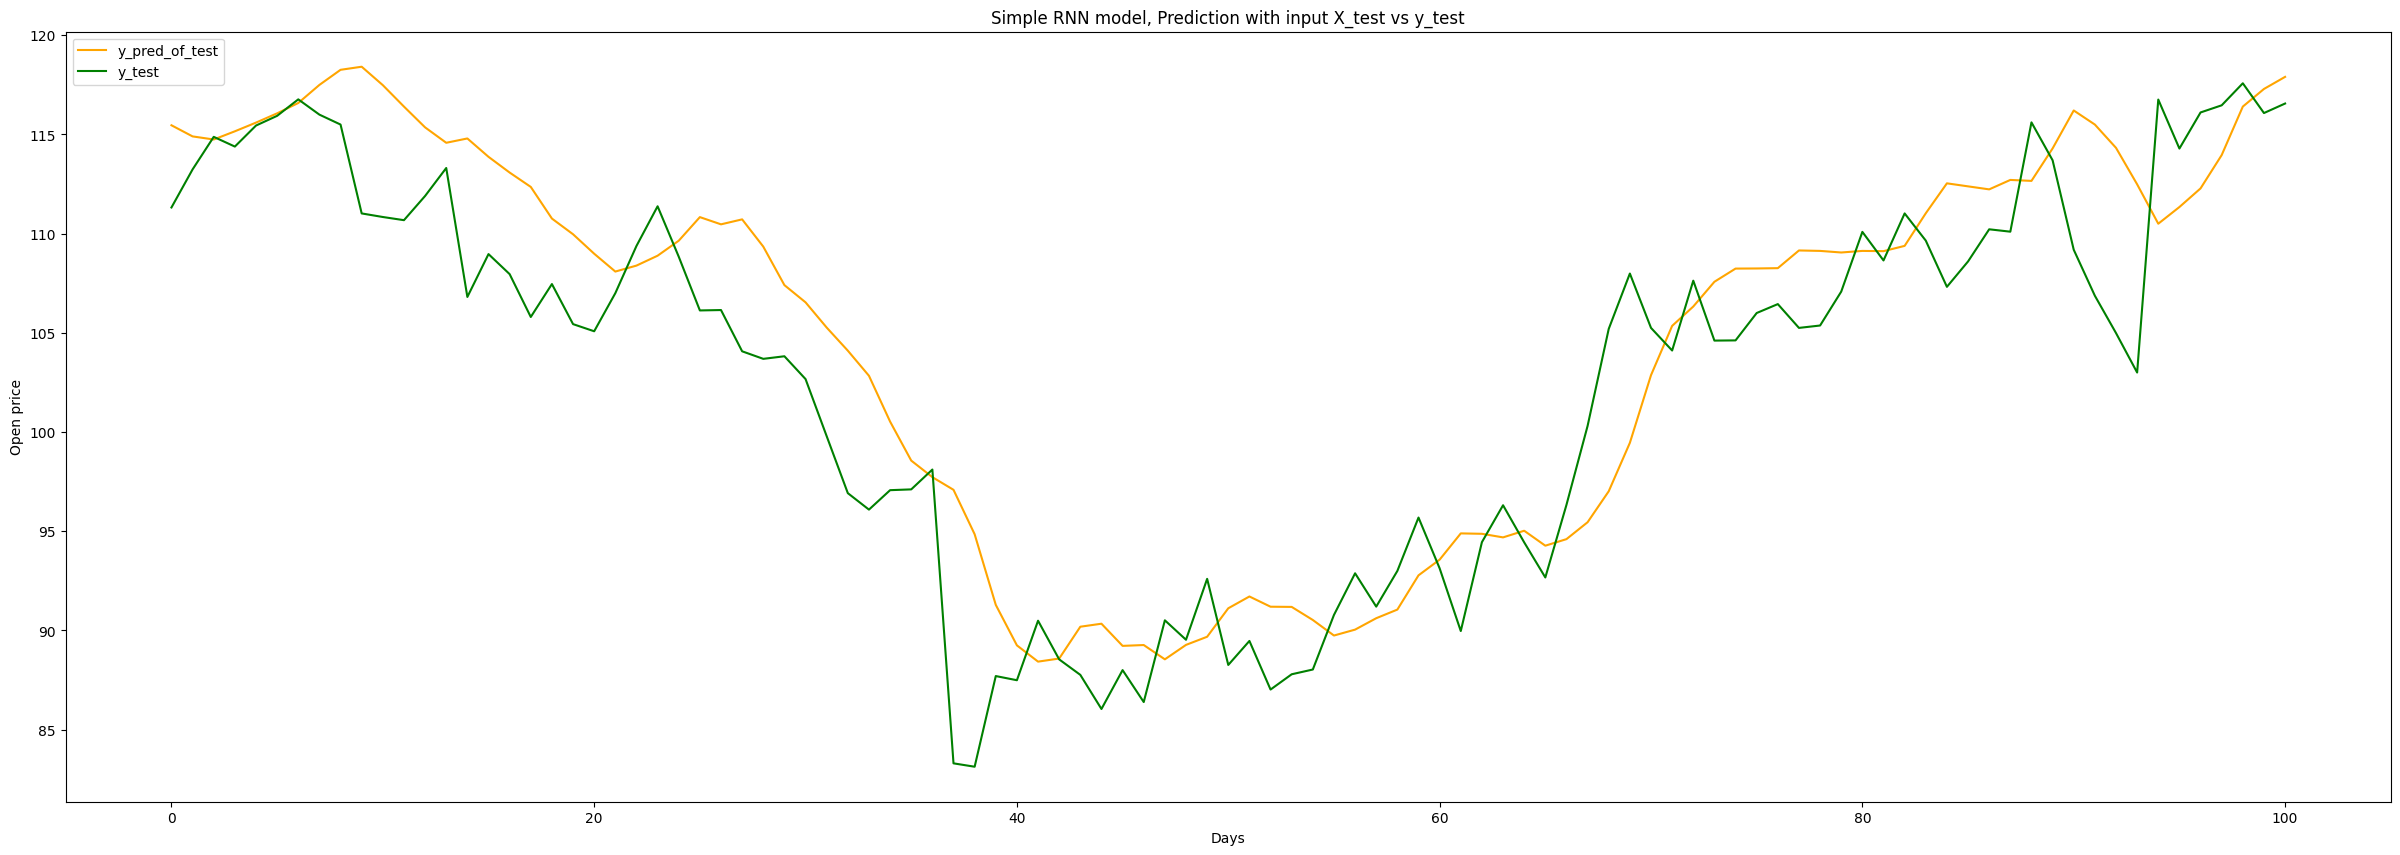

In [48]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

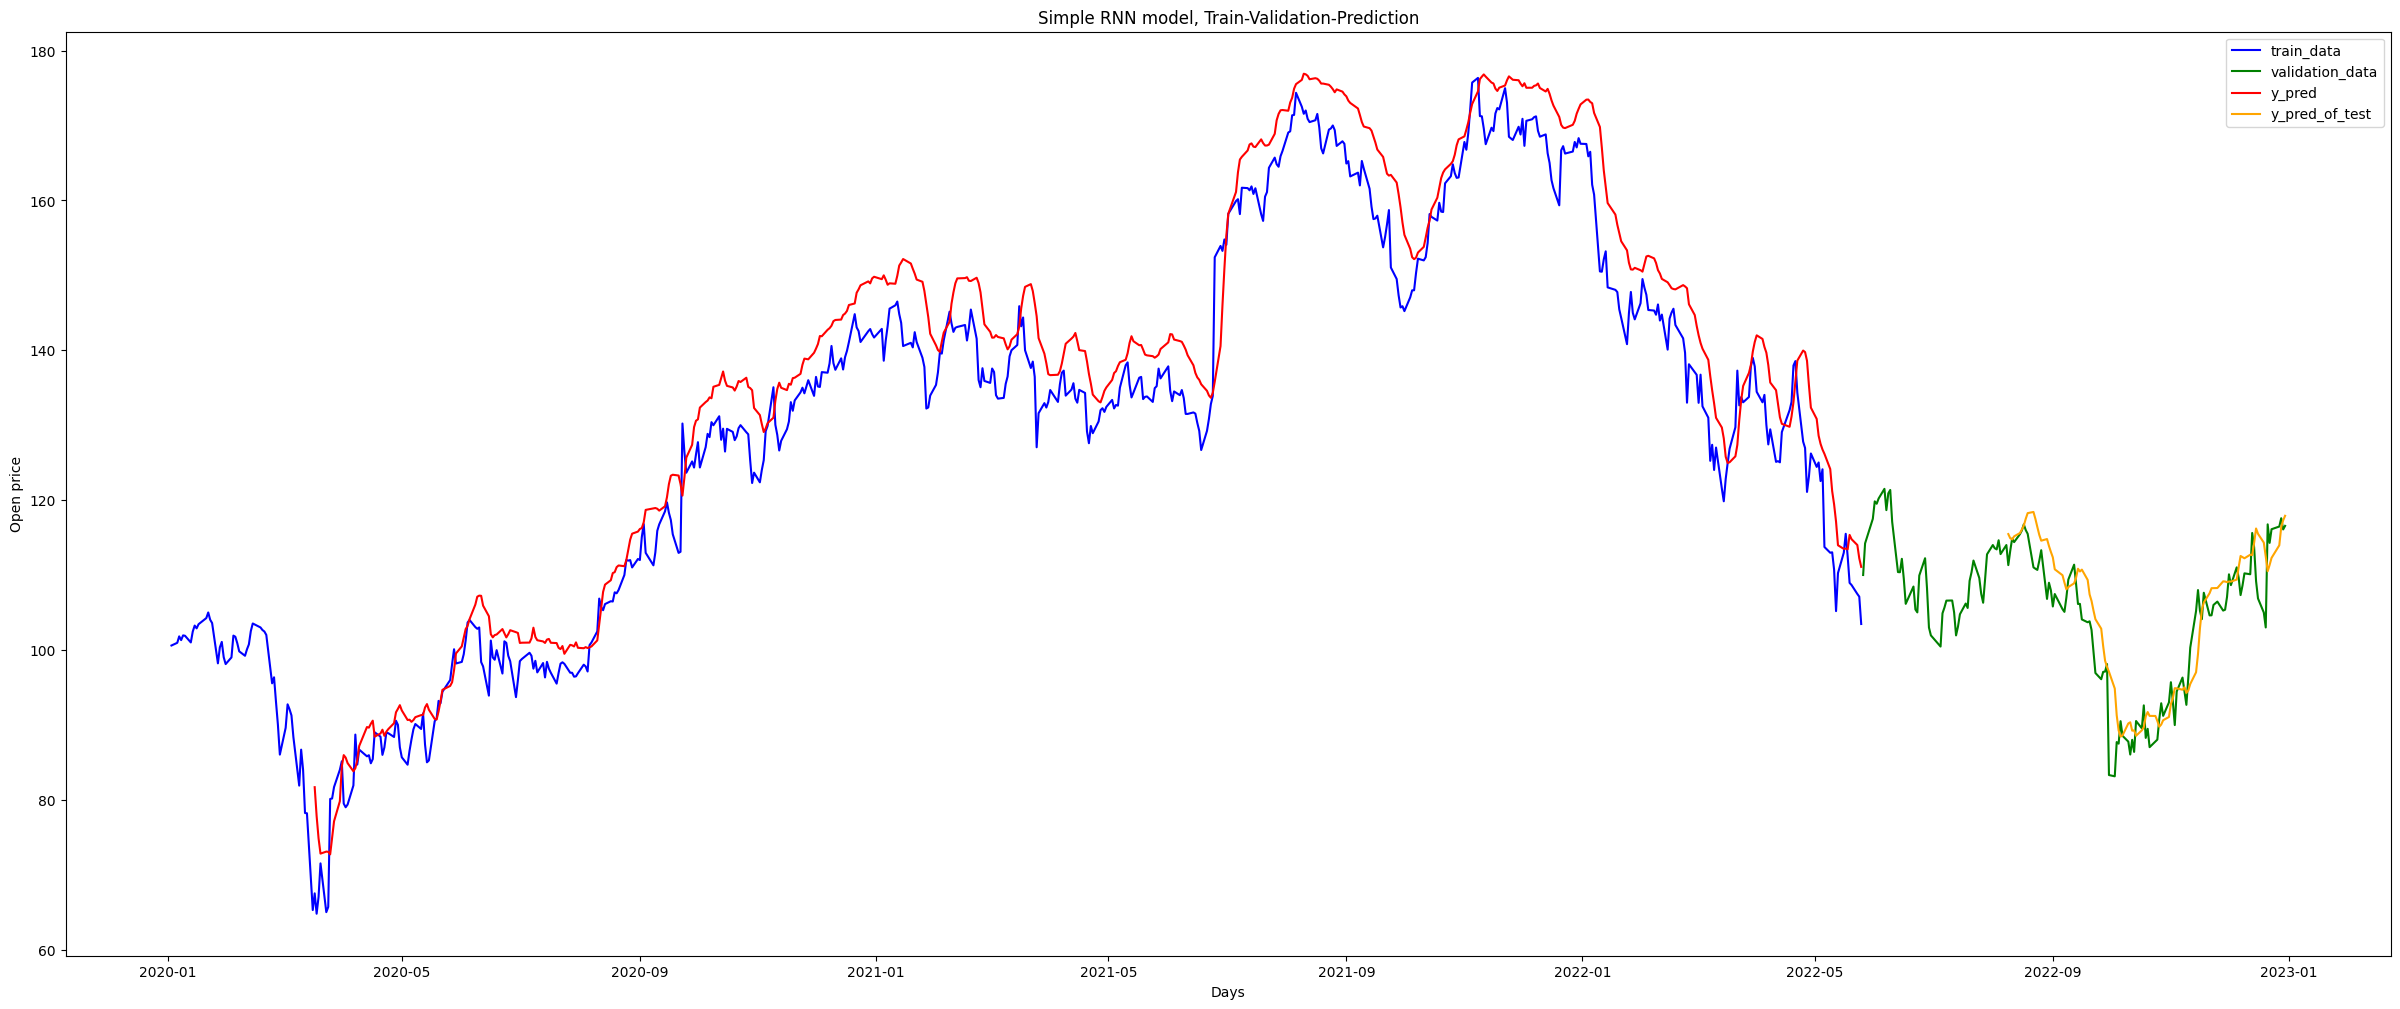

In [49]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [50]:
#Creating LSTM Model

y_train = scaler.fit_transform(y_train)


In [52]:
#Creating LSTM Model

from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
56/56 [==============================] - 8s 59ms/step - loss: 0.0221 - accuracy: 0.0036
Epoch 2/100
56/56 [==============================] - 4s 74ms/step - loss: 0.0032 - accuracy: 0.0036
Epoch 3/100
56/56 [==============================] - 3s 53ms/step - loss: 0.0024 - accuracy: 0.0036
Epoch 4/100
56/56 [==============================] - 3s 53ms/step - loss: 0.0024 - accuracy: 0.0036
Epoch 5/100
56/56 [==============================] - 3s 52ms/step - loss: 0.0023 - accuracy: 0.0036
Epoch 6/100
56/56 [==============================] - 4s 74ms/step - loss: 0.0020 - accuracy: 0.0036
Epoch 7/100
56/56 [==============================] - 5s 83ms/step - loss: 0.0018 - accuracy: 0.0036
Epoch 8/100
56/56 [==============================] - 3s 53ms/step - loss: 0.0021 - accuracy: 0.0036
Epoch 9/100
56/56 [==============================] - 3s 52ms/step - loss: 0.0019 - accuracy: 0.0036
Epoch 10/100
56/56 [==============================] - 4s 71ms/step - loss: 0.0017 - accuracy: 0.0036

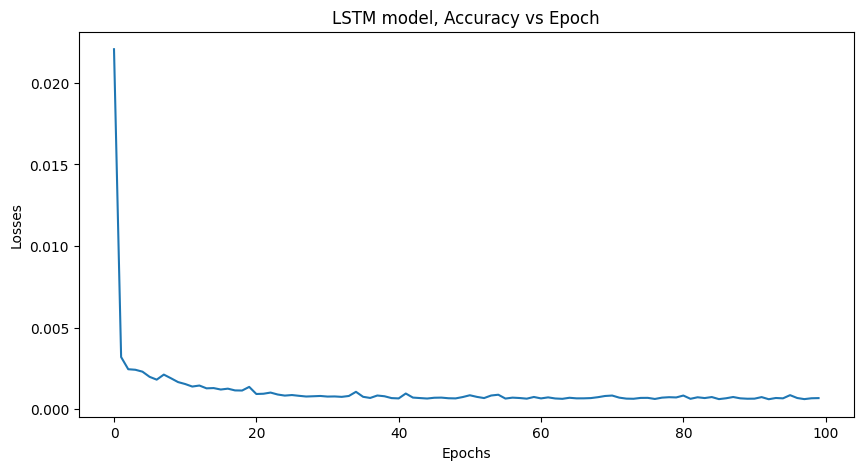

In [53]:
#Evaluating LSTM Model

plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

4/4 [==============================] - 1s 16ms/step


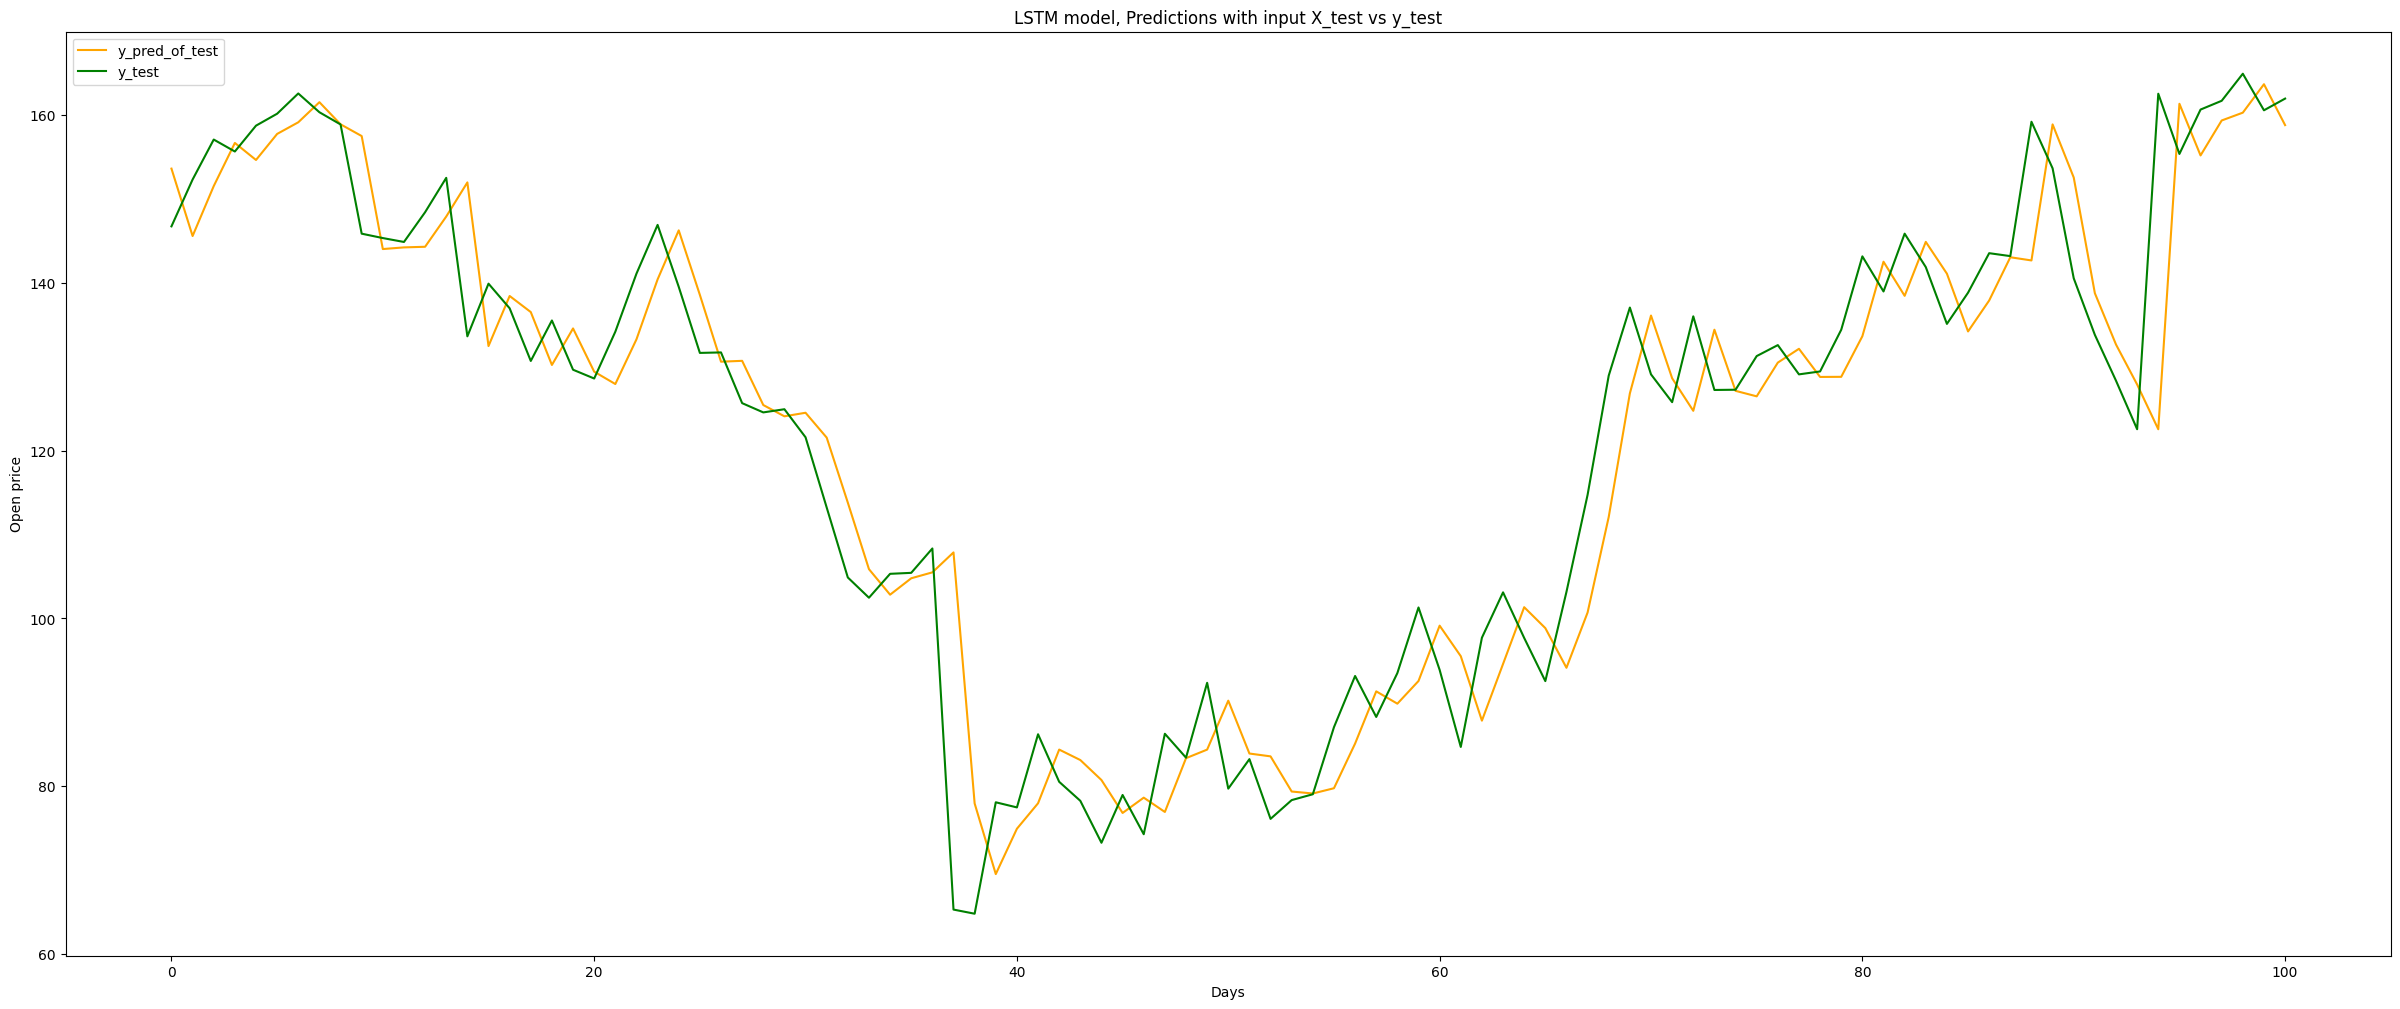

In [54]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [56]:
#Future price prediction

nike.iloc[-1]

Date         2022-12-30
Open         116.559998
High             117.25
Low          115.769997
Close        117.010002
Adj Close    116.677315
Volume          4355500
Name: 754, dtype: object

In [58]:
X_input = nike.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.08017027],
        [0.        ],
        [0.02519646],
        [0.0330498 ],
        [0.12303669],
        [0.1917539 ],
        [0.13678008],
        [0.19568069],
        [0.28370431],
        [0.19993452],
        [0.09653153],
        [0.24312823],
        [0.30399213],
        [0.24280117],
        [0.1848822 ],
        [0.30464671],
        [0.43488216],
        [0.59489519],
        [0.68619102],
        [0.59653141],
        [0.55922779],
        [0.67441088],
        [0.57558904],
        [0.57591633],
        [0.62107329],
        [0.63579833],
        [0.59653141],
        [0.60045821],
        [0.65641367],
        [0.75490822],
        [0.70778801],
        [0.78534019],
        [0.74051051],
        [0.66426701],
        [0.70615175],
        [0.75916231],
        [0.75523551],
        [0.93553663],
        [0.87303651],
        [0.72545816],
        [0.64954197],
        [0.5880235 ],
        [0.52290577],
        [0.97316754],
        [0.89234292],
        [0

In [59]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 30/12/2022     :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 31/12/2022 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 41ms/step
Simple RNN, Open price prediction for 30/12/2022     : 116.84392
LSTM prediction, Open price prediction for 31/12/2022 : 116.20003
